# Keras Face 'Beauty Prediction' acording to redditors canons

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K

In [3]:
epochs = 20
batch_size = 16
img_width=224
img_height=224

In [102]:
train_data_file = 'data\data_r_rateme_comment_lim_12_mask_false_224px_bgr_cleaned.pkl'
df = pd.read_pickle(train_data_file)

### Filtro de imágenes descartables

In [93]:
from pdb import set_trace
df_new = df
#Hace una copia,los elementos los saca de la compia pero itera el original
for ix,sample in df.iterrows():
    cv2.imshow(str(ix),sample['image'])
    k = cv2.waitKey(0)
    cv2.destroyAllWindows()
    if(k == ord("k")):
        pass
    if(k == ord("j")):
        df_new.drop(ix,inplace=True)
    if(k == ord("q")):
        break
df_new = df_new.reset_index()

In [103]:
df_new.to_pickle('data/data_r_rateme_comment_lim_12_mask_false_224px_bgr_cleaned.pkl')

In [104]:
imgs = np.array([list(cv2.resize(img,(img_width,img_height))) for img in df['image'].to_numpy()])/255
scores_series = df['score']
scores = scores_series.to_numpy()
img_train,img_test,score_train,score_test = train_test_split(imgs,scores,test_size=0.2,random_state=42)
input_shape = img_train.shape[1:]
#scores_series.plot.hist(grid=0, rwidth=0.9,color='#0504aa')

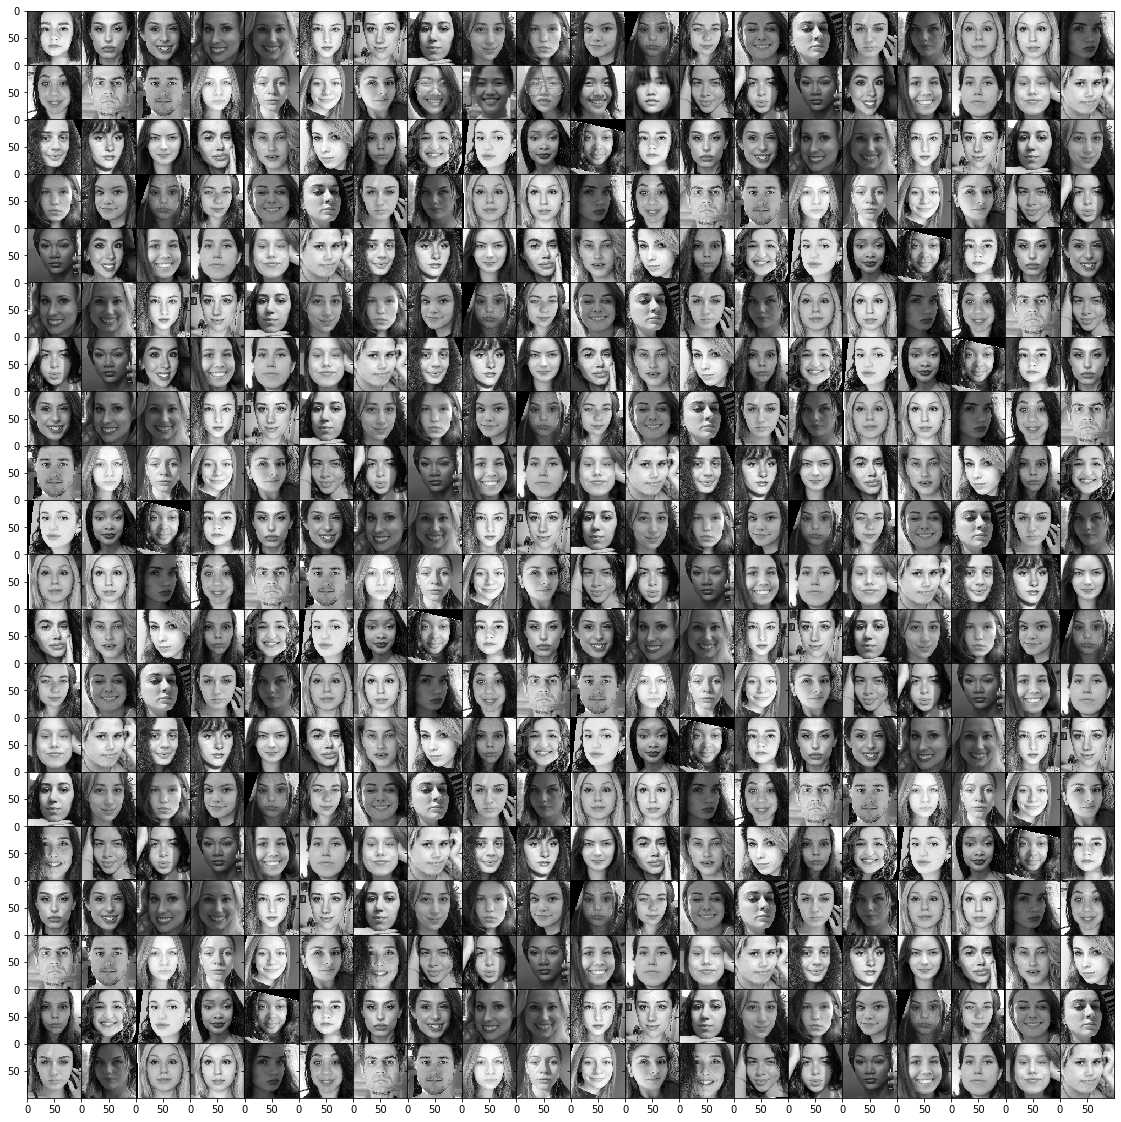

<Figure size 432x288 with 0 Axes>

In [105]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(20, 20),  # creates 2x2 grid of axes
                 axes_pad=0,  # pad between axes in inch.
                 )
for ax, im in zip(grid, df['image'][20:]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im,cmap='gray')
    plt.axis('off')

plt.show()

In [19]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

ValueError: Input 0 is incompatible with layer conv2d_1: expected ndim=4, found ndim=3

In [8]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=["mean_absolute_percentage_error"]) 

In [8]:
model.fit(img_train,score_train, 
    steps_per_epoch=img_train.shape[0] // batch_size, 
    epochs=epochs, 
    validation_data=(img_test,score_test), 
    validation_steps=img_test.shape[0] // batch_size) 

Train on 476 samples, validate on 120 samples
Epoch 1/20
29/29 [==============================] - 301s 10s/step - loss: 1.0599 - mean_absolute_percentage_error: 19.7952 - val_loss: 0.0972 - val_mean_absolute_percentage_error: 95.7815
Epoch 2/20
29/29 [==============================] - 291s 10s/step - loss: 0.6708 - mean_absolute_percentage_error: 12.6610 - val_loss: 0.0960 - val_mean_absolute_percentage_error: 79.8004
Epoch 3/20
29/29 [==============================] - 294s 10s/step - loss: 0.6665 - mean_absolute_percentage_error: 10.7261 - val_loss: 0.0944 - val_mean_absolute_percentage_error: 49.0833
Epoch 4/20
29/29 [==============================] - 291s 10s/step - loss: 0.6662 - mean_absolute_percentage_error: 10.4190 - val_loss: 0.0940 - val_mean_absolute_percentage_error: 33.9660
Epoch 5/20
29/29 [==============================] - 295s 10s/step - loss: 0.6631 - mean_absolute_percentage_error: 8.9310 - val_loss: 0.0938 - val_mean_absolute_percentage_error: 25.2933
Epoch 6/20
29/2

In [9]:
model.load_weights('model_saved_faces_1064.h5')

In [16]:
model.predict(np.array([img_test[0]]))[0][0]

0.4953004

In [49]:
score_predicted = model.predict(img_test)

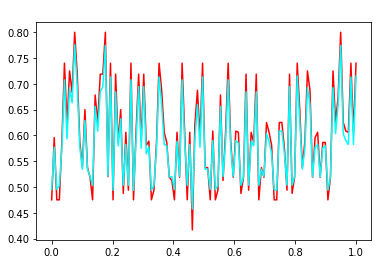

In [57]:
y_predicted = [y[0] for y in score_predicted]
X = np.linspace(0, 1, len(y_predicted), endpoint=True)
plt.plot(X,score_test,c="red")
plt.plot(X,score_predicted,c="cyan")
plt.title("Score real(rojo) / Score Predicho(cyan)",c="white")
plt.show()

## Guardar modelo con drive, desde colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
model.save_weights("/content/gdrive/My Drive/model_saved_faces.h6")